In [5]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as ans 
from sklearn.tree import DecisionTreeClassifier

In [6]:
data=pd.read_csv('C:/Users/91932/Documents/iris_data.csv')

In [7]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

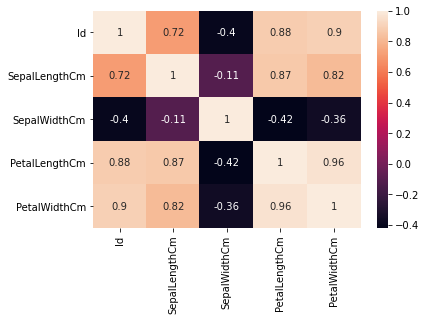

In [9]:
correlation=ans.heatmap(data.corr(),annot=True)

In [10]:
xs=data[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
ys=data[['Species']]


In [11]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [12]:
data.shape

(150, 6)

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
x_train,x_test,y_train,y_test=train_test_split(xs,ys,test_size=0.2)

In [17]:
print('shape of x trainset{}'.format(x_train.shape),'shape of x testset{}'.format(x_test.shape))

shape of x trainset(120, 4) shape of x testset(30, 4)


##modeling 


In [19]:
tree_classifier=DecisionTreeClassifier(criterion='entropy')

In [21]:
tree_classifier.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

###predict

In [22]:
y_pred=tree_classifier.predict(x_test)

In [23]:
y_pred

array(['Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor'], dtype=object)

In [64]:
# if thenew data will come and we want to predict the data belongs to which class

In [24]:
new_data=tree_classifier.predict([[1.2,3.2,4,5]])

In [25]:
new_data

array(['Iris-virginica'], dtype=object)

##Evaluation part

In [26]:
from sklearn import metrics
from sklearn.metrics import classification_report

In [27]:
print("classificatio report",classification_report(y_test,y_pred))

classificatio report                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       1.00      0.93      0.96        14
 Iris-virginica       0.90      1.00      0.95         9

       accuracy                           0.97        30
      macro avg       0.97      0.98      0.97        30
   weighted avg       0.97      0.97      0.97        30



In [28]:
print("model_accuracy",metrics.accuracy_score(y_test,y_pred))

model_accuracy 0.9666666666666667


#Tree diagram

[Text(523.125, 1283.5, 'X[3] <= 0.8\nentropy = 1.581\nsamples = 120\nvalue = [43, 36, 41]'),
 Text(348.75, 1132.5, 'entropy = 0.0\nsamples = 43\nvalue = [43, 0, 0]'),
 Text(697.5, 1132.5, 'X[2] <= 4.75\nentropy = 0.997\nsamples = 77\nvalue = [0, 36, 41]'),
 Text(348.75, 981.5, 'X[3] <= 1.65\nentropy = 0.196\nsamples = 33\nvalue = [0, 32, 1]'),
 Text(174.375, 830.5, 'entropy = 0.0\nsamples = 32\nvalue = [0, 32, 0]'),
 Text(523.125, 830.5, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(1046.25, 981.5, 'X[3] <= 1.85\nentropy = 0.439\nsamples = 44\nvalue = [0, 4, 40]'),
 Text(871.875, 830.5, 'X[2] <= 5.3\nentropy = 0.837\nsamples = 15\nvalue = [0, 4, 11]'),
 Text(697.5, 679.5, 'X[0] <= 6.5\nentropy = 0.971\nsamples = 10\nvalue = [0, 4, 6]'),
 Text(523.125, 528.5, 'X[1] <= 3.1\nentropy = 0.811\nsamples = 8\nvalue = [0, 2, 6]'),
 Text(348.75, 377.5, 'X[2] <= 5.05\nentropy = 0.592\nsamples = 7\nvalue = [0, 1, 6]'),
 Text(174.375, 226.5, 'entropy = 0.0\nsamples = 4\nvalue = [0, 0, 4]'

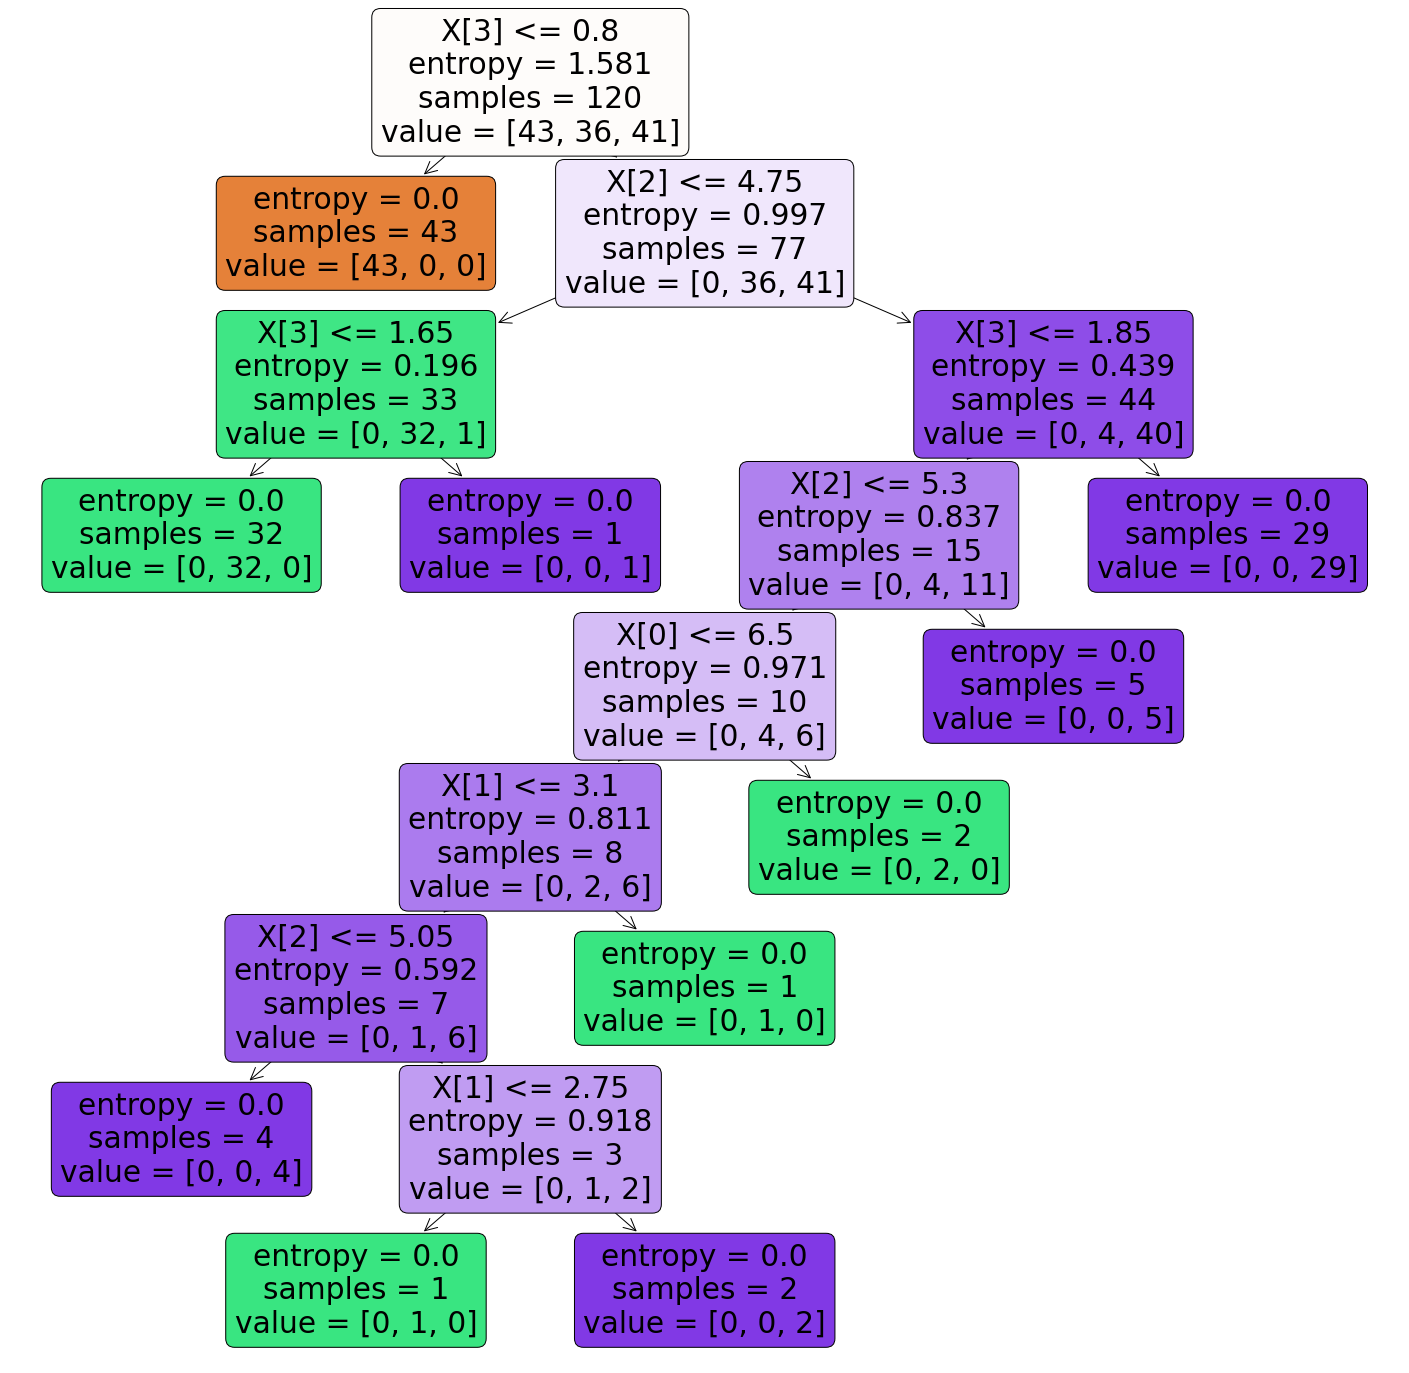

In [29]:
from sklearn import tree
plt.figure(figsize=(25,25))
tree.plot_tree(tree_classifier,
              rounded=True,
              filled=True)
